This algorithm defines clusters as continuous regions of high density.

• For each instance, the algorithm counts how many instances are located within a
small distance ε (epsilon) from it. This region is called the instance’s ε-
neighborhood.

• If an instance has at least min_samples instances in its ε-neighborhood (including
itself), then it is considered a core instance. In other words, **core instances are those that are located in dense regions**

• All instances in the **neighborhood of a core instance belong to the same cluster.**
This neighborhood may include other core instances; therefore, a **long sequence of neighboring core instances forms a single cluster.**

• Any instance that is not a core instance and does not have one in its neighborhood
is considered an anomaly.

This algorithm works well if all the clusters are dense enough and if they are well separated
by low-density regions.

In [1]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=1000, noise=0.05)
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.05)

In [3]:
dbscan.labels_[:20]

array([ 0,  0,  1, -1,  1, -1,  2,  2,  1,  1,  3,  1,  2,  1,  1,  1,  2,
        1,  2,  0], dtype=int64)

some instances have a **cluster index equal to –1**, which means that they
are considered as anomalies by the algorithm.

In [4]:
len(dbscan.core_sample_indices_)

817

In [5]:
dbscan.core_sample_indices_[:10]

array([ 0,  1,  2,  4,  7,  8,  9, 10, 11, 12], dtype=int64)

In [6]:
dbscan.components_

array([[-0.99534563,  0.16447991],
       [-0.95390262,  0.25329896],
       [ 2.03461013,  0.36841198],
       ...,
       [ 1.58061429, -0.22669316],
       [ 1.6917497 , -0.26238097],
       [ 0.23645871, -0.09265073]])

In [8]:
import numpy as np
np.unique(dbscan.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6], dtype=int64)

In [14]:
np.bincount(dbscan.labels_)

ValueError: 'list' argument must have no negative elements

In [15]:
np.unique(dbscan.labels_, return_counts=True)

(array([-1,  0,  1,  2,  3,  4,  5,  6], dtype=int64),
 array([ 62,  71, 410, 340,  49,  43,  21,   4], dtype=int64))

In [16]:
dbscan2 = DBSCAN(eps=0.2)
dbscan2.fit(X)

DBSCAN(eps=0.2)

In [17]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)

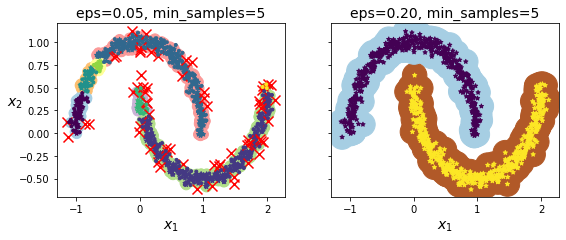

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_dbscan(dbscan, X, size=100)

plt.subplot(122)
plot_dbscan(dbscan2, X, size=600, show_ylabels=False)

plt.show()

the DBSCAN class **does not have a predict() method**, although
it has a fit_predict() method. In other words, it cannot predict which cluster a new
instance belongs to. This implementation decision was made because different classification
algorithms can be better for different tasks, so the authors decided to let the
user choose which one to use.

In [20]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

KNeighborsClassifier(n_neighbors=50)

In [21]:
>>> X_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])
>>> knn.predict(X_new)

array([0, 4, 2, 1], dtype=int64)

In [22]:
knn.predict_proba(X_new)

array([[0.88, 0.04, 0.  , 0.  , 0.08, 0.  , 0.  ],
       [0.  , 0.26, 0.  , 0.  , 0.74, 0.  , 0.  ],
       [0.  , 0.2 , 0.8 , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.98, 0.  , 0.  , 0.  , 0.  , 0.02]])

we only trained the classifier on the core instances, but we could also have
chosen to train it on all the instances, or all but the anomalies: this choice depends on
the final task.

DBSCAN is a very simple yet powerful algorithm capable of identifying any
number of clusters of any shape. It is robust to outliers, and it has just two hyperparameters
(eps and min_samples). If the density varies significantly across the clusters,
however, it can be impossible for it to capture all the clusters properly. Its computational
complexity is roughly O(m log(m)), making it pretty close to linear with regard
to the number of instances, but Scikit-Learn’s implementation can require up to
O(m^2) memory if eps is large.

### Other Clustering Algorithms

Agglomerative clustering

BIRCH

Mean-Shift

Affinity propagation

Spectral clustering

